# Spotify Personal Data

Analyzing the features of my top 100 streamed songs in 2018 and 2019 based on personal data collected from Spotify. This notebook is meant to trace patterns that can then be used to build a model that would predict the probability that I would like a new song.

In [1]:
import sys
import spotipy
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib
from spotipy.oauth2 import SpotifyClientCredentials
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
CCM = SpotifyClientCredentials(client_id='token', 
                               client_secret='token')
sp = spotipy.Spotify(client_credentials_manager = CCM)

In [3]:
def features(playlist):
    data = pd.DataFrame(columns=['name','danceability','energy','key',
                        'loudness','speechiness','acousticness', 
                        'instrumentalness','liveness','valence',
                        'tempo','duration_ms'])
    tracks = playlist['items']
    while playlist['next']:
        playlist = sp.next(playlist)
        tracks.extend(playlist['items'])
    for i in range(0, len(tracks)):
        song_features = sp.audio_features(tracks[i]['track']['id'])[0]
        song_features['name'] = tracks[i]['track']['name']
        for key in data.keys():
            data.loc[i, key] = song_features[key]
            
    return data

In [14]:
# UPLOADING PLAYLISTS
ndzn = features(sp.user_playlist_tracks(
      '2273exo4mylzm3zcnbcgw76xa', '03Y3gDelBveftXRv6pZidT'))
top_2018 = features(sp.user_playlist_tracks(
      '2273exo4mylzm3zcnbcgw76xa', '618MxfbEajTfcfxfKHe9oo'))
top_2019 = features(sp.user_playlist_tracks(
      '2273exo4mylzm3zcnbcgw76xa', '2JHAlM3UNdaUUoiSDMSD0C'))

In [20]:
top_2019.head()

,name,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,Blanka,0.798,0.564,2,-5.98,0.047,0.23,1.83e-05,0.183,0.394,108.004,254218
1,Deux frères,0.794,0.659,7,-7.063,0.0498,0.143,0.00224,0.0944,0.308,112.019,247460
2,Onizuka,0.688,0.569,10,-7.007,0.0375,0.392,0.000175,0.12,0.359,109.041,252373
3,Au DD,0.777,0.698,6,-7.706,0.0704,0.293,2.32e-05,0.0908,0.119,119.963,247161
4,MOWGLI II,0.729,0.533,9,-10.104,0.444,0.747,4.54e-06,0.0848,0.422,155.999,225953


In [17]:
top_2018.head()

,name,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,A Vava Inouva,0.716,0.21,4,-19.576,0.0395,0.964,0.0123,0.0837,0.432,111.908,266760
1,Qu'est-ce que je t'ai fait BB,0.834,0.691,11,-6.655,0.0919,0.205,0,0.0675,0.798,148.496,291918
2,Nonstop,0.912,0.412,7,-8.074,0.124,0.0164,0.013,0.104,0.422,154.983,238614
3,Do I Wanna Know?,0.548,0.532,5,-7.596,0.0323,0.186,0.000263,0.217,0.405,85.03,272394
4,SICKO MODE,0.834,0.73,8,-3.714,0.222,0.00513,0,0.124,0.446,155.008,312820


## Features distribution

Comparing the top 100 songs streamed on Spotify in 2018 and 2019

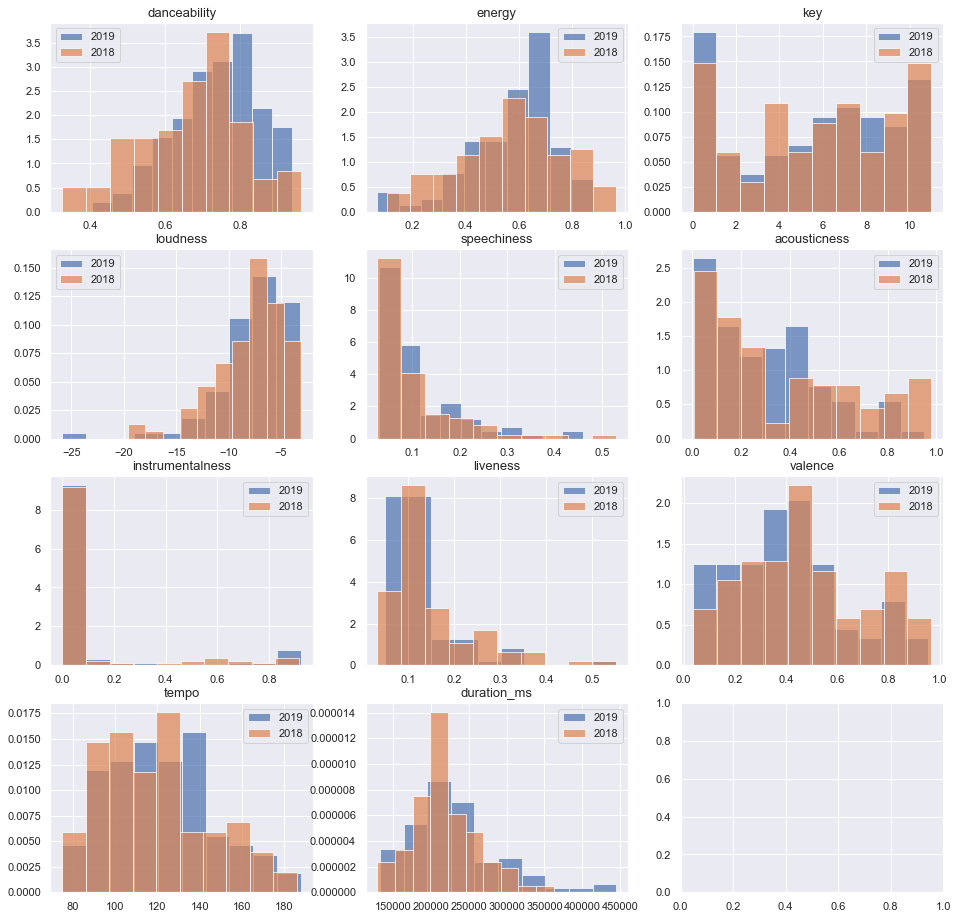

In [19]:
sns.set()
fig, ax = plt.subplots(4, 3, figsize=(16,16))
for _ in range(1, 12):
    plt.subplot(4, 3, _)
    plt.title(top_2019.columns[_], fontsize=13)
    plt.hist(list(top_2019.iloc[:,_]), density=True,
             alpha=.7, label='2019')
    plt.hist(list(top_2018.iloc[:,_]), density=True,
             alpha=.7, label='2018')
    plt.legend()
plt.show()

## Pair plots of features

Highlighting correlations between song features

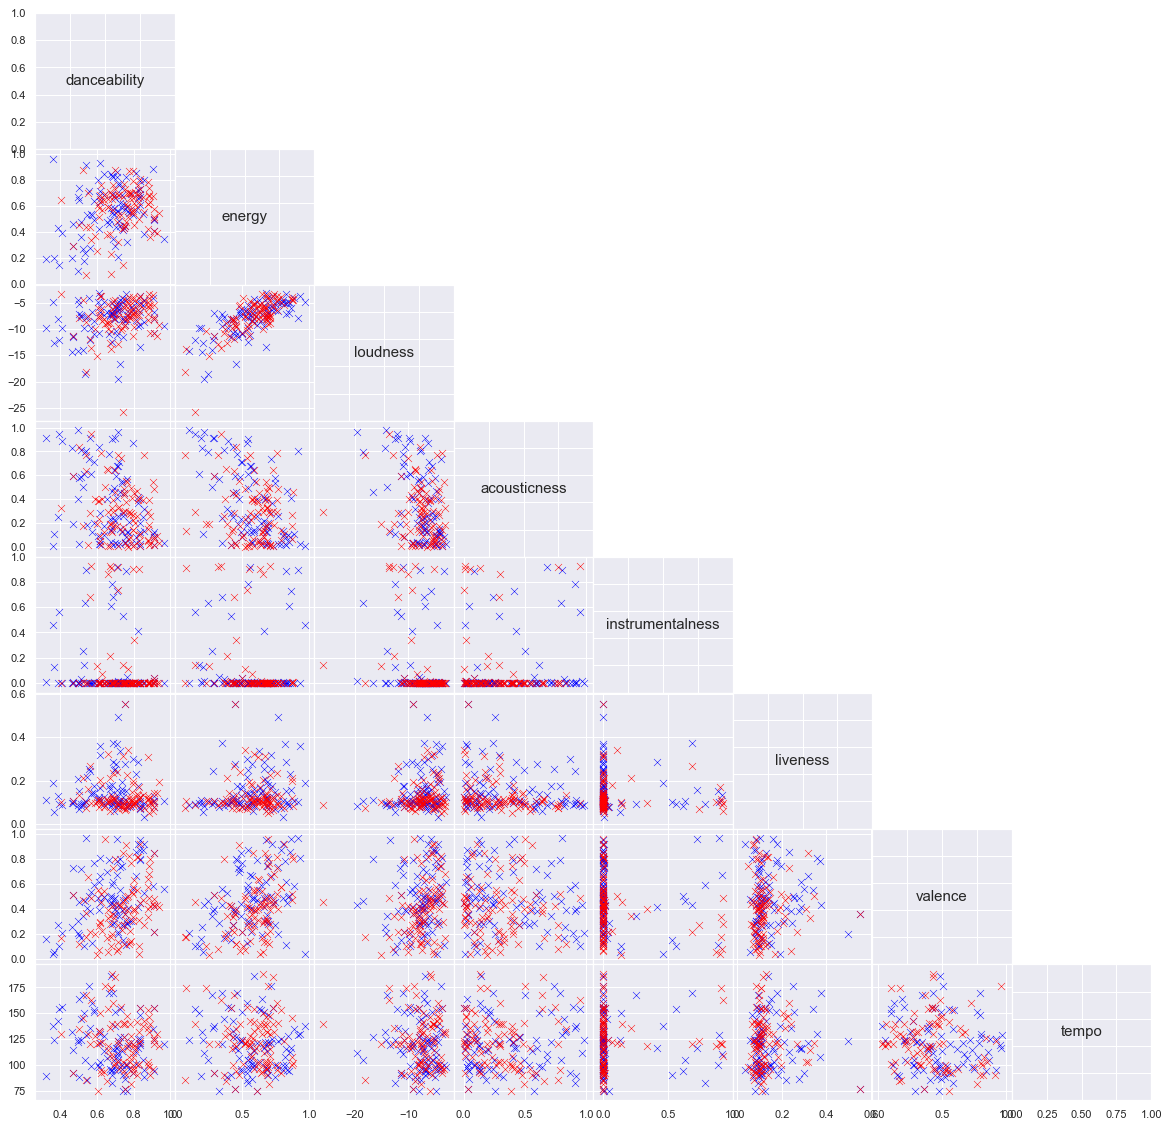

In [90]:
import matplotlib.gridspec as gridspec
features = ['danceability', 'energy', 'loudness',
            'acousticness', 'instrumentalness', 
            'liveness', 'valence', 'tempo']
plt.figure(figsize = (20, 20))
gs1 = gridspec.GridSpec(len(features), len(features))
gs1.update(wspace=0, hspace=0)
for i in range(0, len(features)):
    f_y = features[i]
    for j in range(0, len(features)):
        ax = plt.subplot(gs1[i, j])
        f_x = features[j]
        if (i < len(features) - 1): 
            ax.tick_params(axis='x', labelbottom=False, 
                           labelleft=False, direction='in') 
        if (j > 0):
            ax.tick_params(axis='y', labelbottom=False, 
                           labelleft=False, direction='in') 
        if j == i:
            ax.annotate(f_x, (0.5, 0.5), xycoords='axes fraction', 
                        ha='center', va='center', fontsize=15)
            continue 
        if j > i:
            ax.axis('off')
            continue    
        ax.scatter(top_2018[f_x], top_2018[f_y], color='blue',
                   s = 50, marker='x', linewidth=.5, label='2018')
        ax.scatter(top_2019[f_x], top_2019[f_y], color='red',
                   s = 50, marker='x', linewidth=.5, label='2019')

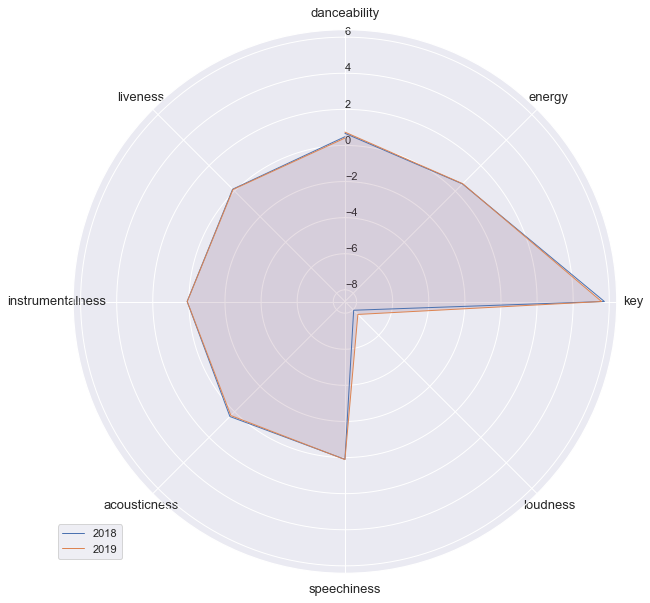

In [88]:
# RADAR CHART
fea_2018, fea_2019 = [], []
for _ in range(1, 10):
    fea_2018.append(np.mean(top_2018.iloc[:,_]))
    fea_2019.append(np.mean(top_2019.iloc[:,_]))
    
# data = pd.DataFrame(fea_2018, fea_2019)
angles = [n / float(8) * 2 * np.pi for n in range(8)]
angles += angles[:1]
plt.figure(figsize = (10, 10))
ax = plt.subplot(111, polar=True)
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
plt.xticks(angles[:-1], top_2018.columns[1:10], fontsize=13)
ax.set_rlabel_position(0)
ax.plot(angles, fea_2018, linewidth=1, linestyle='solid', label="2018")
ax.fill(angles, fea_2019, 'b', alpha=0.1)
ax.plot(angles, fea_2019, linewidth=1, linestyle='solid', label="2019")
ax.fill(angles, fea_2019, 'r', alpha=0.1)
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.show()